a

stud_math.csv
Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [1]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

%matplotlib inline

In [2]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
students.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [4]:
# pre functions


'''отображает количество уникальных значений в столбце, частоту встречаний значений, 
info() про столбец, стат.данные для номинативных значений (count, unique, top, freq),
график частоты встречающихся значений, 
если есть порпущенные значения - количество таких записей,
таблицу всех записей с пропущенными значениями'''


def column_info(column):
    print('Столбец ', column)
    print('---------------------------')
    print('Уникальных значений', students[column].nunique())

    display(students[column].value_counts())
    students.loc[:, [column]].info()

    if students[column].dtype == object:
        display(students[column].describe(include=[object]))

    sns.countplot(x=column, data=students)
    plt.show()
    st_with_na = students.loc[students[column].isna()]
    if len(st_with_na) > 0:
        print('Пропущено значений ', len(st_with_na))
        display(st_with_na)


'''отображает стат.данные для числовых столбцов'''


def numeric_col_info(column):
    st = students[column].value_counts().reset_index()

    display(students[column].describe())


'''для числовых столбцов: отображает границы выбросов, к-тво выбросов'''


def has_outliers(column, df=students):
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25

    print('---------------------------')
    print('Границы выбросов: ', perc25-1.5*IQR, ', ', perc75+1.5*IQR)
    print('---------------------------')

    ok_values_cnt = (df[column].loc[df[column].between(
        perc25-1.5*IQR, perc75+1.5*IQR)]).count()
    outliers_cnt = df[column].count() - ok_values_cnt

    print('---------------------------')
    print('Количество выбросов', outliers_cnt)
    print('---------------------------')


'''заменяет NaN значение в столбце на моду (самое частое значение, которое встречается в столбце)'''


def replace_nan_by_mode(column):
    students[column].fillna(students[column].mode()[0], inplace=True)
    column_info(column)


'''заменяет NaN значение в столбце на медиану '''


def replace_nan_by_median(column):
    students[column].fillna(students[column].median(), inplace=True)
    column_info(column)


'''для столбца, который содержит номинативные числовые данные переводит записи в строки
для удобтва использования функции describe(include=[object])'''


def nominative_column_to_str(column):
    students[column] = students[column].apply(
        lambda x: x if pd.isna(x) else str(int(x)))


'''строит боксплот для зависимости столбца и успешности (score), 
учитывается 10 самых часто встречающихся категорий значений для столбца
строит график частоты встречания самих значений столбца (на том же срезе выборки)'''


def get_boxplot(column):

    fig = plt.figure()

    fig, axes = plt.subplots(figsize=(6, 4))
    sns.boxplot(x=column,
                y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=axes)
    axes.set_title('Boxplot for '+column)
    plt.xticks(rotation=45)
    plt.show()

    sns.countplot(x=column, data=students.loc[students.loc[:, column].isin(
        students.loc[:, column].value_counts().index[:10])])
    plt.show()


'''т-тест (ttest_ind) для определения значимости столбца по отношению к успешности'''


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [5]:
'''заменить NaN значения, сохраняя пропорции распределения значений 
в полностью заполненных строках данных (если всего значений 2)'''
'''a/b = x/y; x+y=n1, n1 - количество NaN записей; a, b - частота встречания записей top_val, sec_val'''
'''без глобальных переменных не нашла как выкрутиться'''

import math
top_val = 0
sec_val = 0
cnt = 0


def replace_nan_in_propotion(column):
    global top_val
    global sec_val
    global cnt

    top_val = students[column].value_counts().reset_index()['index'][0]
    sec_val = students[column].value_counts().reset_index()['index'][1]
    top_fr = students[column].value_counts().reset_index()[column][0]
    sec_fr = students[column].value_counts().reset_index()[column][1]

    n1 = len(students.loc[students[column].isna()])
    x = math.ceil(top_fr*n1 / (top_fr + sec_fr))
    cnt = x

    '''x - запись в ячейке
    cnt - сколько NaN-записей надо заменить на топ-значение (top_val)
    остальные NaN-записи заменить на второе значение (sec_val)'''
    def change_x_by_proportion(x):
        global top_val
        global sec_val
        global cnt
        if ((pd.isna(x)) and (cnt > 0)):
            #print('cnt ', cnt, top_val)
            cnt -= 1
            return top_val
        if ((pd.isna(x)) and (cnt <= 0)):
            #print('sec val ', cnt, sec_val)
            return sec_val
        return x

    students[column] = students[column].apply(change_x_by_proportion)

числовые столбцы : age, absences, score

другие столбцы с числовыми значениями содержат номинатвные данные - числа, которые означают тот или иной признак. часто для таких значений встречаться в описании стат.данные, которые выводятся для числовых признаков, игнорируем, при необходимости значения будут переписываться в object и тогда стат.данные будут иметь осмысленный вид
(речь про функцию describe(include=[object])

Столбец  age
---------------------------
Уникальных значений 8


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


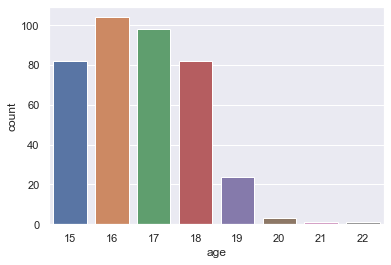

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

---------------------------
Границы выбросов:  13.0 ,  21.0
---------------------------
---------------------------
Количество выбросов 1
---------------------------


In [6]:
# анализируем на выбросы числовые столбцы: age, score, absences
column_info('age')
numeric_col_info('age')
has_outliers('age')

есть выброс, на значении 22 года, удаляем его

In [7]:
students = students.loc[students.age <= 21]

Столбец  score
---------------------------
Уникальных значений 18


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     30
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   388 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


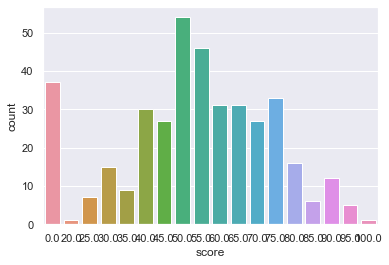

Пропущено значений  6


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


count    388.000000
mean      52.293814
std       22.940126
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

---------------------------
Границы выбросов:  -5.0 ,  115.0
---------------------------
---------------------------
Количество выбросов 0
---------------------------


In [8]:
column_info('score')
numeric_col_info('score')
has_outliers('score')

удаляем строки, в которых значение score не указано

In [9]:
students = students.loc[~students.score.isna()]

Столбец  absences
---------------------------
Уникальных значений 36


0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


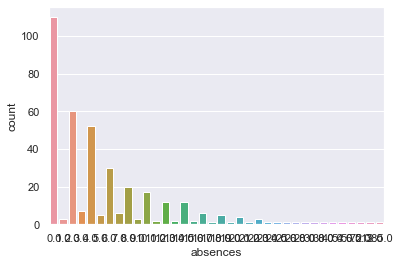

Пропущено значений  11


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

---------------------------
Границы выбросов:  -12.0 ,  20.0
---------------------------
---------------------------
Количество выбросов 17
---------------------------


In [10]:
column_info('absences')
numeric_col_info('absences')
has_outliers('absences')

есть выбросы, обсудим их чуть ниже

Посмотрим на связь состояния здоровья и количества пропусков занятий. Возможно, студенты с плохим состоянием здоровья пропускают занятия чаще?

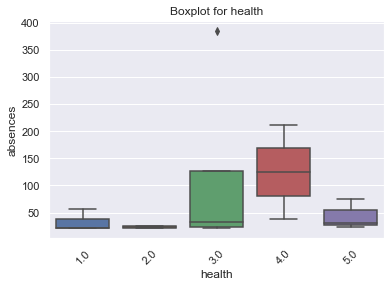

In [11]:
fig, axes = plt.subplots(figsize=(6, 4))
sns.boxplot(x='health',
            y='absences',
            data=students.loc[students.absences > 20],
            ax=axes)
axes.set_title('Boxplot for health')
plt.xticks(rotation=45)
plt.show()

нет, состояние здоровья на прямую не связано. Видно, что те, у кого, состояние здоровья 1,2 пропустили зантий меньше, чем те, у кого состояние здоровья оценено на 4,5

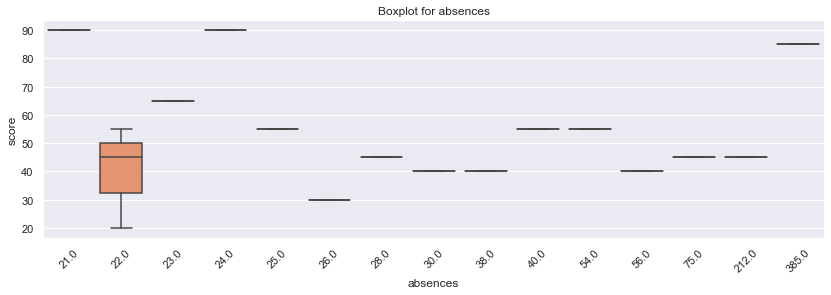

In [12]:
fig, axes = plt.subplots(figsize=(14, 4))
sns.boxplot(x='absences',
            y='score',
            data=students.loc[students.absences > 20],
            ax=axes)
axes.set_title('Boxplot for absences')
plt.xticks(rotation=45)
plt.show()

Удалять выбросы тут не хочется, количество записей 17 (почти 4.4% выборки), к тому же в значениях выбросов 3 (из почти 100) соответствуют самым высоким баллам за экзамен (больше Q3; >70)

пропуски заполним медианой

Столбец  absences
---------------------------
Уникальных значений 36


0.0      110
4.0       63
2.0       60
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


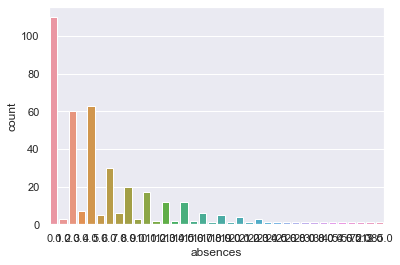

In [13]:
replace_nan_by_median('absences')

Столбец  school
---------------------------
Уникальных значений 2


GP    343
MS     45
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top        GP
freq      343
Name: school, dtype: object

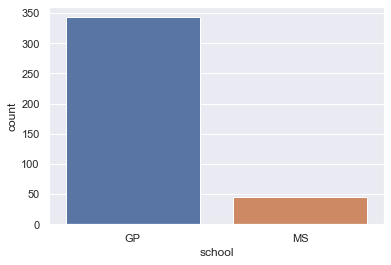

Столбец  sex
---------------------------
Уникальных значений 2


F    204
M    184
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top         F
freq      204
Name: sex, dtype: object

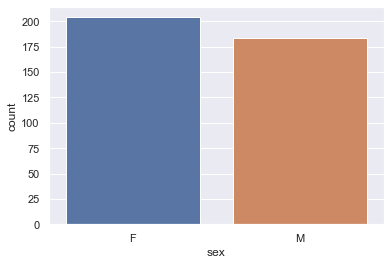

Столбец  age
---------------------------
Уникальных значений 7


16    103
17     98
15     82
18     80
19     21
20      3
21      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     388 non-null    int64
dtypes: int64(1)
memory usage: 16.1 KB


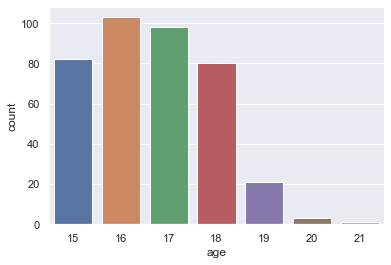

In [14]:
column_info('school')
column_info('sex')
column_info('age')

In [15]:
# school, sex, age - не имеют пропусков в значениях

Столбец  address
---------------------------
Уникальных значений 2


U    290
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  373 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     373
unique      2
top         U
freq      290
Name: address, dtype: object

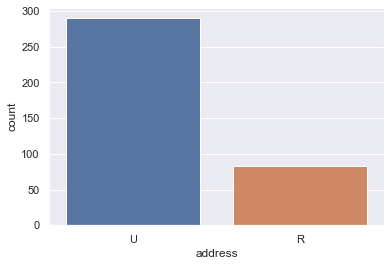

Пропущено значений  15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,4.0,60.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0


In [16]:
column_info('address')

address  traveltime
R        1.0            34
         2.0            26
         3.0            12
         4.0             4
U        1.0           197
         2.0            63
         3.0             9
         4.0             3
Name: address, dtype: int64

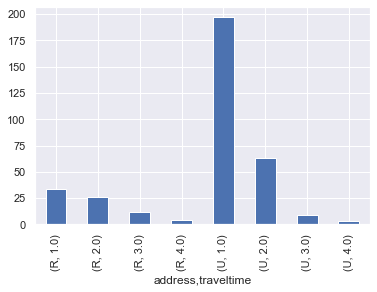

In [17]:
#address - traveltime
address_traveltime = students.groupby(by=['address', 'traveltime'])[
    'address'].agg('count')
display(address_traveltime)

address_traveltime.plot(kind='bar')

что живующие за городом, что в городе имеют признак traveltime всех значений (1,2,3,4 встречаются в каждой выборке).
Посмотрим, какие значения traveltime у тех, записей, где пропущено значение address

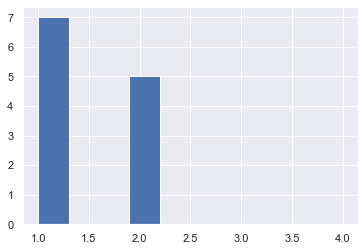

In [18]:
students.loc[students.address.isna()].traveltime.hist(range=(1, 4))

встречаются значения 1, 2, есть пропущенные, к тому же U является модой для всей выборки в целом, заменяем пропущенные значения в столбце address на U

In [19]:
students.address = students.address.apply(lambda x: 'U' if pd.isna(x) else x)

Столбец  famsize
---------------------------
Уникальных значений 2


GT3    254
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  361 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     361
unique      2
top       GT3
freq      254
Name: famsize, dtype: object

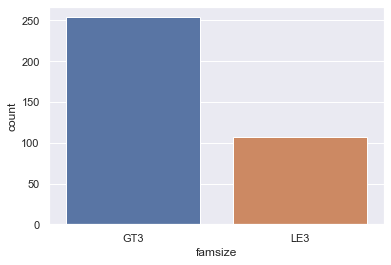

Пропущено значений  27


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,4.0,90.0


In [20]:
column_info('famsize')

для пропущенных значений famsize введем значение UNK unknown

In [21]:
students.famsize = students.famsize.apply(lambda x: 'UNK' if pd.isna(x) else x)

Столбец  Pstatus
---------------------------
Уникальных значений 2


T    307
A     36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  343 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     343
unique      2
top         T
freq      307
Name: Pstatus, dtype: object

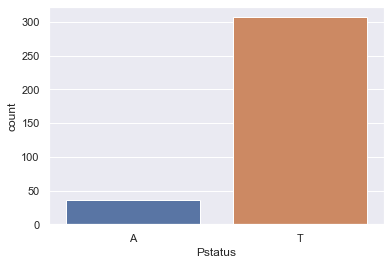

Пропущено значений  45


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,UNK,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


In [22]:
column_info('Pstatus')

аналогично, для пропущенных значений Pstatus введем значение UNK unknown

In [23]:
students.Pstatus = students.Pstatus.apply(lambda x: 'UNK' if pd.isna(x) else x)

In [24]:
#nominative_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
#                   'famrel', 'freetime', 'goout', 'health']

#for col in nominative_cols:
#    nominative_column_to_str(col)

Столбец  Medu
---------------------------
Уникальных значений 5


4.0    131
2.0    100
3.0     95
1.0     56
0.0      3
Name: Medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    385 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


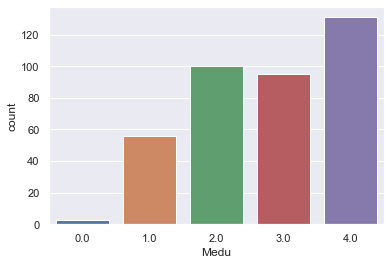

Пропущено значений  3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,U,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,UNK,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,UNK,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [25]:
column_info('Medu')

Столбец  Mjob
---------------------------
Уникальных значений 5


other       127
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    369 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count       369
unique        5
top       other
freq        127
Name: Mjob, dtype: object

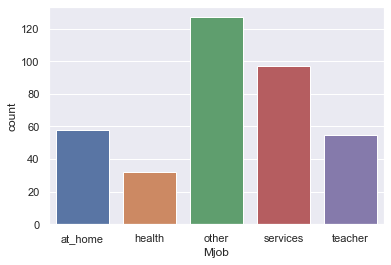

Пропущено значений  19


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,UNK,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,UNK,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,UNK,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


In [26]:
column_info('Mjob')

Значение Medu (Fedu) будем заполнять с учетом значений Mjob (Fjob):
Для каждой сферы работы найдем наиболее часто встречаемую категорию образования.

В свою очередь, пропуски в Mjob (Fjob) заполним значеним other - это является и модой для выборки мам и пап, и по здравому смыслу хорошо подходит.

In [27]:
job_edu_m = students.groupby(by=['Mjob', 'Medu'])['Medu'].agg('count')
display(job_edu_m)

#  чаще всего встречается такое соотношение между работа-образование среди мам:
# at_home  - 1
# health   - 4
# other    - 2
# services - 3
# teacher  - 4
# на основании этого делаем замену для недостающих данных в колонке Medu


def correctMedu_byMjob():
    students.loc[(students.Medu.isna()) & (
        students.Mjob == 'at_home'), 'Medu'] = 1
    students.loc[(students.Medu.isna()) & (
        students.Mjob == 'health'), 'Medu'] = 4
    students.loc[(students.Medu.isna()) & (
        students.Mjob == 'other'), 'Medu'] = 2
    students.loc[(students.Medu.isna()) & (
        students.Mjob == 'services'), 'Medu'] = 3
    students.loc[(students.Medu.isna()) & (
        students.Mjob == 'teacher'), 'Medu'] = 4


correctMedu_byMjob()

Mjob      Medu
at_home   0.0      2
          1.0     25
          2.0     21
          3.0      8
          4.0      2
health    1.0      1
          2.0      2
          3.0      5
          4.0     24
other     0.0      1
          1.0     23
          2.0     43
          3.0     36
          4.0     22
services  1.0      5
          2.0     30
          3.0     37
          4.0     24
teacher   3.0      3
          4.0     52
Name: Medu, dtype: int64

Столбец  Mjob
---------------------------
Уникальных значений 5


other       127
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    369 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count       369
unique        5
top       other
freq        127
Name: Mjob, dtype: object

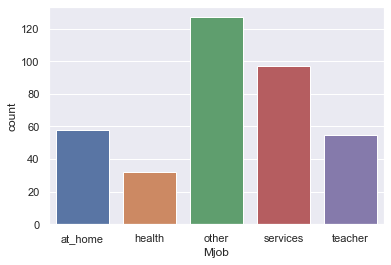

Пропущено значений  19


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,UNK,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,UNK,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,UNK,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


In [28]:
column_info('Mjob')

Столбец  Fedu
---------------------------
Уникальных значений 6


2.0     105
3.0      94
4.0      88
1.0      74
0.0       2
40.0      1
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    364 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


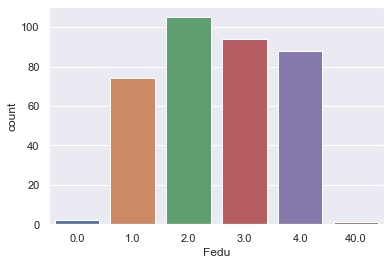

Пропущено значений  24


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,UNK,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [29]:
column_info('Fedu')

предполагаю, что значение 40 является опечаткой, заменяю на значение 4

In [30]:
students.loc[students.Fedu == 40, 'Fedu'] = 4

Столбец  Fedu
---------------------------
Уникальных значений 5


2.0    105
3.0     94
4.0     89
1.0     74
0.0      2
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    364 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


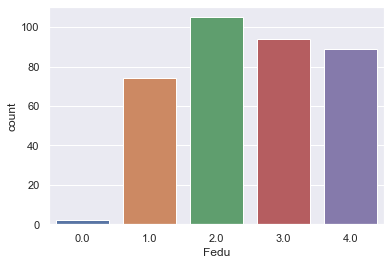

Пропущено значений  24


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,UNK,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [31]:
column_info('Fedu')

In [32]:
job_edu_f = students.groupby(by=['Fjob', 'Fedu'])['Fedu'].agg('count')
display(job_edu_m)

#  чаще всего встречается такое соотношение между работа-образование среди пап:
# at_home  - 1
# health   - 4
# other    - 2
# services - 3
# teacher  - 4
# на основании этого делаем замену для недостающих данных в колонке Fedu


def correctFedu_byFjob():
    students.loc[(students.Fedu.isna()) & (
        students.Fjob == 'at_home'), 'Fedu'] = 1
    students.loc[(students.Fedu.isna()) & (
        students.Fjob == 'health'), 'Fedu'] = 4
    students.loc[(students.Fedu.isna()) & (
        students.Fjob == 'other'), 'Fedu'] = 2
    students.loc[(students.Fedu.isna()) & (
        students.Fjob == 'services'), 'Fedu'] = 3
    students.loc[(students.Fedu.isna()) & (
        students.Fjob == 'teacher'), 'Fedu'] = 4


correctFedu_byFjob()

Mjob      Medu
at_home   0.0      2
          1.0     25
          2.0     21
          3.0      8
          4.0      2
health    1.0      1
          2.0      2
          3.0      5
          4.0     24
other     0.0      1
          1.0     23
          2.0     43
          3.0     36
          4.0     22
services  1.0      5
          2.0     30
          3.0     37
          4.0     24
teacher   3.0      3
          4.0     52
Name: Medu, dtype: int64

In [33]:
# дополним недостающее записи в Mjob(Fjob)
students.Mjob = students.Mjob.apply(lambda x: 'other' if pd.isna(x) else x)
students.Fjob = students.Fjob.apply(lambda x: 'other' if pd.isna(x) else x)
correctFedu_byFjob()
correctMedu_byMjob()

Столбец  reason
---------------------------
Уникальных значений 4


course        135
reputation    102
home          101
other          33
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  371 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count        371
unique         4
top       course
freq         135
Name: reason, dtype: object

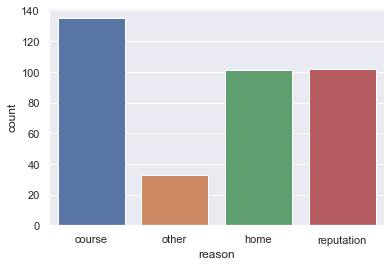

Пропущено значений  17


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,UNK,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,UNK,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,2.0,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,UNK,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0


In [34]:
column_info('reason')

мода - courses, по здравому смыслу пропущенные значения хочу заполнить значениями other

In [35]:
students.reason = students.reason.apply(lambda x: 'other' if pd.isna(x) else x)

Столбец  guardian
---------------------------
Уникальных значений 3


mother    247
father     86
other      24
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  357 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count        357
unique         3
top       mother
freq         247
Name: guardian, dtype: object

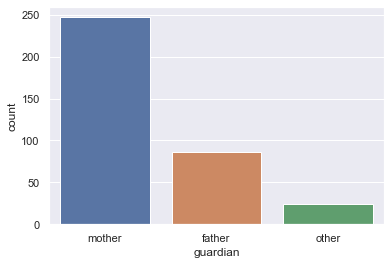

Пропущено значений  31


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,UNK,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,other,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


In [36]:
column_info('guardian')

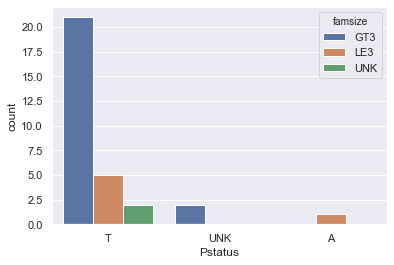

In [37]:
sns.countplot(
    x='Pstatus', data=students.loc[students.guardian.isna()], hue='famsize')

Наиболее часто для строк с пропущенным guardian признак проживания -  T, и семья больше чем 3 человека,  что скорее всего значит, что семья полная и проживает вместе.
заменим пропуски на mother, как на моду


Столбец  guardian
---------------------------
Уникальных значений 3


mother    278
father     86
other      24
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count        388
unique         3
top       mother
freq         278
Name: guardian, dtype: object

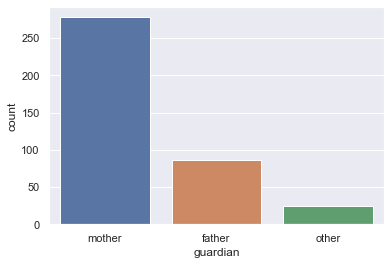

In [38]:
replace_nan_by_mode('guardian')

Столбец  traveltime
---------------------------
Уникальных значений 4


1.0    238
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  360 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


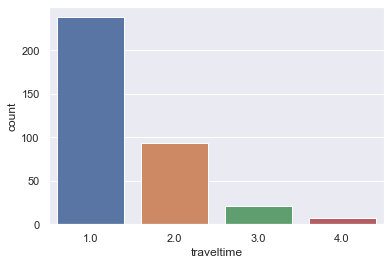

Пропущено значений  28


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,other,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,other,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,UNK,2.0,2.0,at_home,other,other,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


In [39]:
column_info('traveltime')

как уже смотрели раннее - значение 1 является модой для двух групп: и для тех, кто живет в городе, и для тех, кто за городом. Заменяем пропуски на моду выборки

Столбец  traveltime
---------------------------
Уникальных значений 4


1.0    266
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


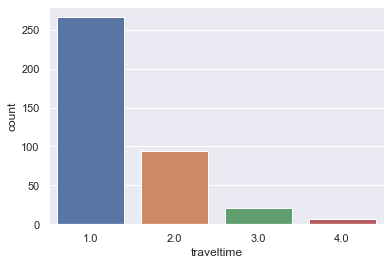

In [40]:
replace_nan_by_mode('traveltime')

Столбец  studytime
---------------------------
Уникальных значений 4


2.0    189
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  381 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


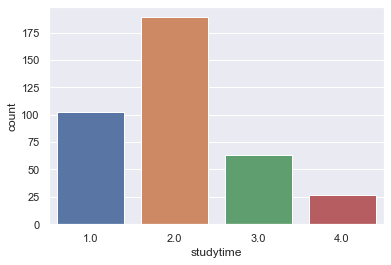

Пропущено значений  7


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,UNK,2.0,2.0,at_home,other,other,mother,1.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,UNK,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,4.0,90.0
227,GP,M,17,U,LE3,UNK,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,4.0,60.0
266,GP,M,17,U,GT3,UNK,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [41]:
column_info('studytime')

заменим пропуски на значение моды

Столбец  studytime
---------------------------
Уникальных значений 4


2.0    196
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


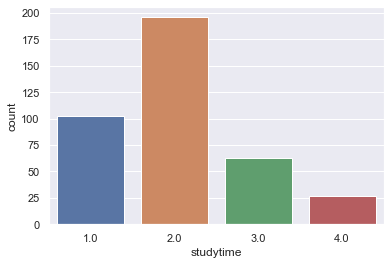

In [42]:
replace_nan_by_mode('studytime')

Столбец  failures
---------------------------
Уникальных значений 4


0.0    290
1.0     48
2.0     15
3.0     13
Name: failures, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  366 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


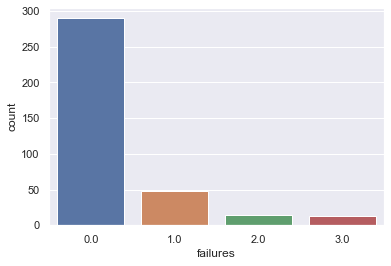

Пропущено значений  22


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,UNK,3.0,3.0,other,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,1.0,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,other,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,UNK,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,UNK,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [43]:
column_info('failures')

<Figure size 432x288 with 0 Axes>

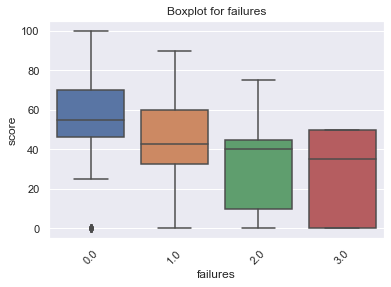

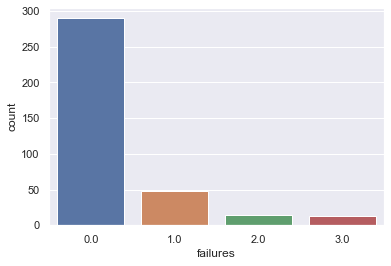

In [44]:
get_boxplot('failures')

признак failures довольно противоречивый, значение 0 может соответствовать как отсуствию неудач, так и их количеству 4+, что видно на боксплоте. 

рассмотрим для записей с пропущенным значением failures как распредела успещность студентов

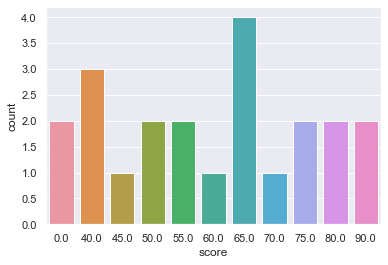

In [45]:
sns.countplot(x='score', data=students.loc[students.failures.isna()])

на графике видно, что нет явных смещений в успешности студентов. Чтоб не искажать данные введем новую категорию для NaN в столбце failures: -1

In [46]:
students.failures.fillna(-1, inplace=True)

<Figure size 432x288 with 0 Axes>

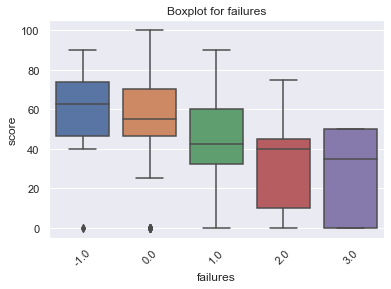

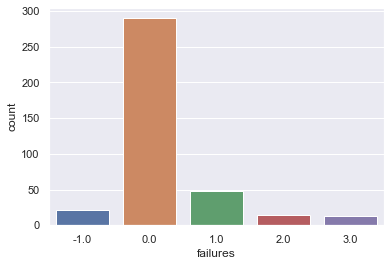

In [47]:
get_boxplot('failures')

Столбец  schoolsup
---------------------------
Уникальных значений 2


no     330
yes     49
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  379 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     379
unique      2
top        no
freq      330
Name: schoolsup, dtype: object

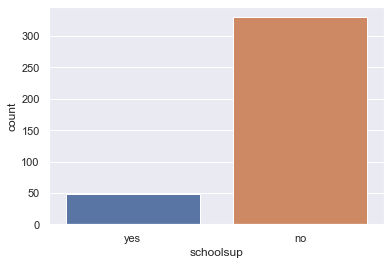

Пропущено значений  9


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,UNK,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,-3.0,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,other,father,1.0,1.0,0.0,NaN,no,no,no,yes,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


Столбец  famsup
---------------------------
Уникальных значений 2


yes    216
no     134
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  350 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     350
unique      2
top       yes
freq      216
Name: famsup, dtype: object

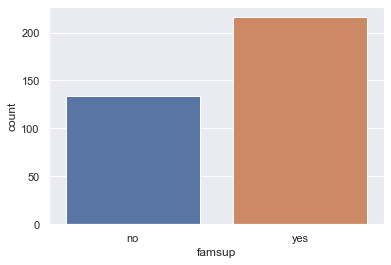

Пропущено значений  38


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,2.0,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,UNK,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,other,mother,1.0,2.0,0.0,no,NaN,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,other,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


In [48]:
column_info('schoolsup')
column_info('famsup')

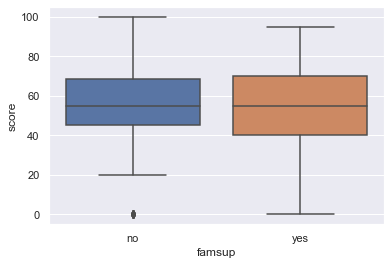

In [49]:
sns.boxplot(x='famsup', y='score', data=students)

по заполненным данным не очевидно, что есть связь с успешностью

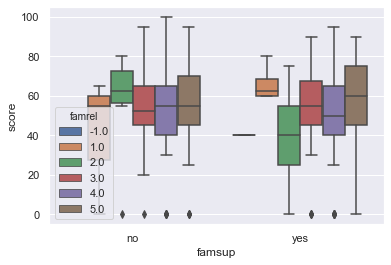

In [50]:
sns.boxplot(x='famsup', y='score', data=students, hue='famrel')

исходя из этого графика видно, что однозначной прямой связи хороших отношений в семье, помощи с уроками и успешности нет. студенты с отношениями плохими (1, оранж цвет) имеют помощь с уроками от семьи, и имеют успешность выше чем студенты с хорошими отнощениями (5, кор.цв.) и с помощью с уроками и без нее. С отношениями 2 (зел. цв.) успешность носит обратный характер зависимости с помощью с уроками в семье.
Вероятно этот признак не будет включен в нашу модель.
Заменим пропуски на моду.

Столбец  famsup
---------------------------
Уникальных значений 2


yes    254
no     134
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top       yes
freq      254
Name: famsup, dtype: object

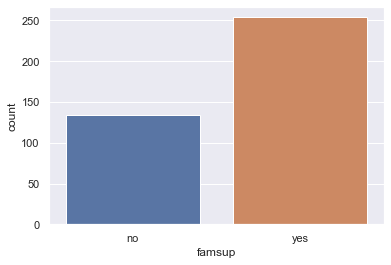

In [51]:
replace_nan_by_mode('famsup')

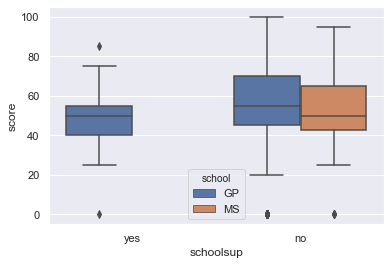

In [52]:
sns.boxplot(x='schoolsup', y='score', data=students, hue='school')

школа MS не организовывает помощь студентам, а для школы GP видим, что средний бал у тех, кто берет доп занятия хоть и ниже, но в группе, где студенты не берут доп занятия размах баллов (нижний ус - который соответствует неуспешности) большой. Вероятно эти данные не будут иметь влияния в нашей модели. Заменим пропуски на моду.

Столбец  schoolsup
---------------------------
Уникальных значений 2


no     339
yes     49
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top        no
freq      339
Name: schoolsup, dtype: object

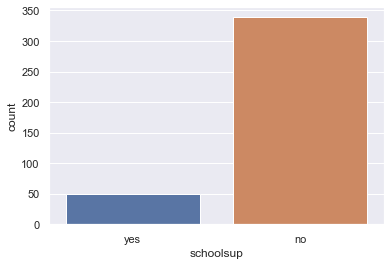

In [53]:
replace_nan_by_mode('schoolsup')

Столбец  paid
---------------------------
Уникальных значений 2


no     196
yes    153
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    349 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     349
unique      2
top        no
freq      196
Name: paid, dtype: object

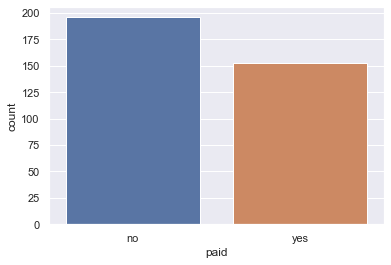

Пропущено значений  39


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,-1.0,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,other,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,yes,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,reputation,mother,1.0,2.0,-1.0,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,UNK,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


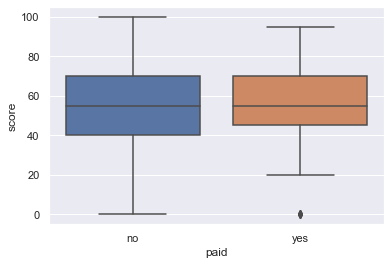

In [54]:
column_info('paid')
sns.boxplot(x='paid', y='score', data=students)

Столбец  activities
---------------------------
Уникальных значений 2


yes    192
no     182
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  374 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     374
unique      2
top       yes
freq      192
Name: activities, dtype: object

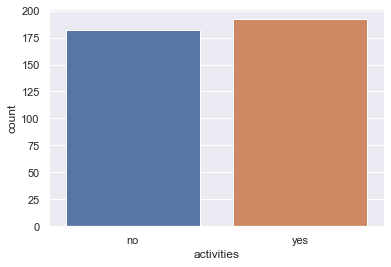

Пропущено значений  14


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,other,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,UNK,3.0,3.0,other,other,other,mother,1.0,1.0,-1.0,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,UNK,2.0,3.0,other,other,home,mother,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,-9.0,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,2.0,2.0,0.0,no,yes,no,NaN,yes,-6.0,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,-6.0,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,other,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,-3.0,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0


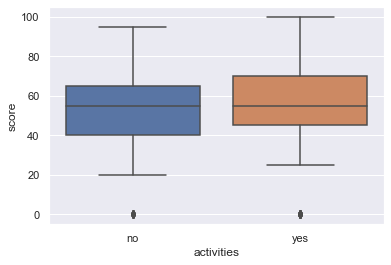

In [55]:
column_info('activities')
sns.boxplot(x='activities', y='score', data=students)

Столбец  nursery
---------------------------
Уникальных значений 2


yes    297
no      76
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  373 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     373
unique      2
top       yes
freq      297
Name: nursery, dtype: object

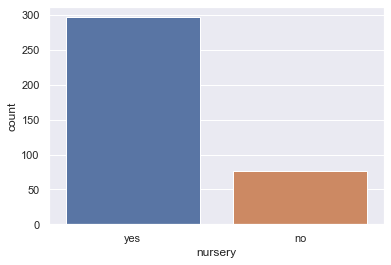

Пропущено значений  15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,UNK,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,-6.0,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,other,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,-9.0,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,NaN,NaN,-6.0,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,-6.0,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,no,no,no,yes,NaN,-6.0,yes,yes,no,5.0,3.0,4.0,4.0,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,other,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,-9.0,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0


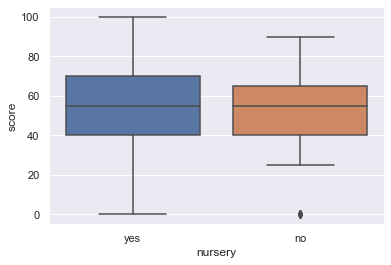

In [56]:
column_info('nursery')
sns.boxplot(x='nursery', y='score', data=students)

Похоже, что параметры paid, activities, nursery не войдут в модель. Заполним пропуски значениями моды.
Возможно хорошим вариантом будет заполнить пропуски пропорционально текущим имеющимся распределениям параметра.

Столбец  paid
---------------------------
Уникальных значений 2


no     235
yes    153
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top        no
freq      235
Name: paid, dtype: object

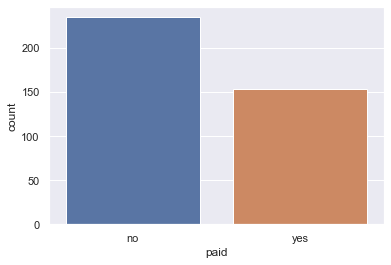

Столбец  activities
---------------------------
Уникальных значений 2


yes    206
no     182
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top       yes
freq      206
Name: activities, dtype: object

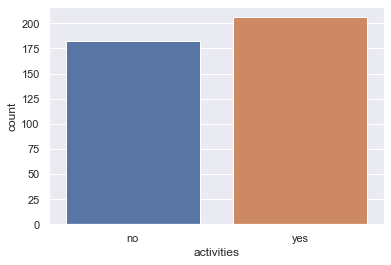

Столбец  nursery
---------------------------
Уникальных значений 2


yes    312
no      76
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top       yes
freq      312
Name: nursery, dtype: object

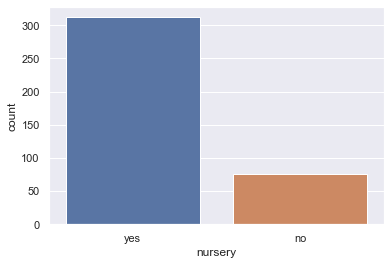

In [57]:
replace_nan_by_mode('paid')
replace_nan_by_mode('activities')
replace_nan_by_mode('nursery')

Столбец  studytime, granular
---------------------------
Уникальных значений 4


-6.0     189
-3.0     102
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  381 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


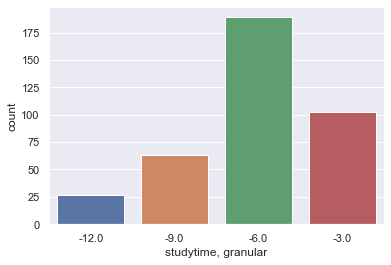

Пропущено значений  7


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,2.0,0.0,yes,yes,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,-1.0,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,UNK,2.0,2.0,at_home,other,other,mother,1.0,2.0,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,UNK,T,4.0,4.0,teacher,teacher,course,mother,1.0,2.0,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,4.0,90.0
227,GP,M,17,U,LE3,UNK,2.0,3.0,services,services,reputation,father,1.0,2.0,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,4.0,60.0
266,GP,M,17,U,GT3,UNK,3.0,1.0,services,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,2.0,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [58]:
column_info('studytime, granular')

возможно studytime, granular это категориальный признак. введем для пропущенных значений новую категорию 0

In [59]:
students['studytime, granular'].fillna(0, inplace=True)

Столбец  higher
---------------------------
Уникальных значений 2


yes    350
no      18
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  368 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     368
unique      2
top       yes
freq      350
Name: higher, dtype: object

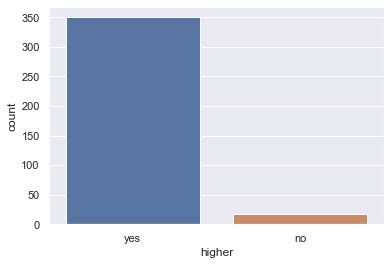

Пропущено значений  20


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,-3.0,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,-1.0,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,UNK,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,-6.0,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,U,GT3,UNK,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,no,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,GP,F,15,U,GT3,T,4.0,3.0,teacher,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,GP,M,15,U,LE3,UNK,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,yes,no,no,yes,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,GP,M,16,R,GT3,UNK,2.0,2.0,at_home,other,course,mother,3.0,1.0,-1.0,no,no,no,no,no,-3.0,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,-1.0,no,yes,no,yes,no,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,-1.0,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


In [60]:
column_info('higher')

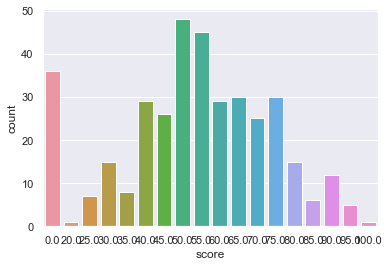

In [61]:
sns.countplot(x='score', data=students.loc[~students.higher.isna()])

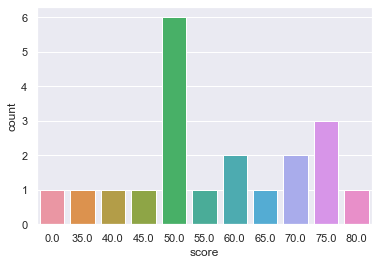

In [62]:
sns.countplot(x='score', data=students.loc[students.higher.isna()])

однозначных выводов сделать не получается, введем новую категорию -1

In [63]:
students.higher.fillna(-1, inplace=True)

Столбец  internet
---------------------------
Уникальных значений 2


yes    299
no      55
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  354 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     354
unique      2
top       yes
freq      299
Name: internet, dtype: object

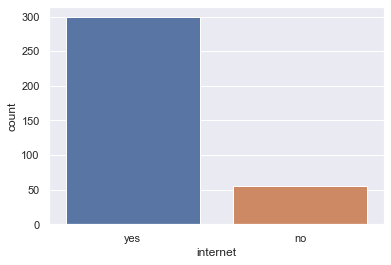

Пропущено значений  34


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,UNK,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,other,other,father,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,course,father,1.0,1.0,0.0,yes,yes,yes,yes,no,-3.0,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,GP,F,16,U,LE3,T,2.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,-1.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,home,father,2.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


In [64]:
column_info('internet')

заменим пропуски в  столбце internet на моду (можно заменить так же и пропорционально replace_nan_in_proportion())

Столбец  internet
---------------------------
Уникальных значений 2


yes    333
no      55
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top       yes
freq      333
Name: internet, dtype: object

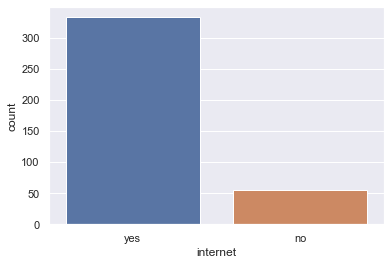

In [65]:
replace_nan_by_mode('internet')

Столбец  romantic
---------------------------
Уникальных значений 2


no     235
yes    122
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  357 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     357
unique      2
top        no
freq      235
Name: romantic, dtype: object

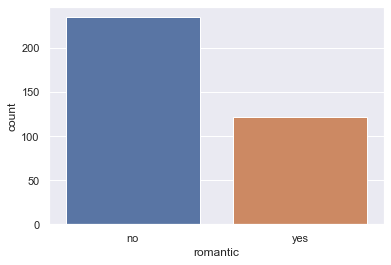

Пропущено значений  31


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
13,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,no,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,mother,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
54,GP,F,15,U,LE3,UNK,3.0,3.0,other,other,other,mother,1.0,1.0,-1.0,no,no,yes,yes,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
67,GP,F,16,U,GT3,UNK,3.0,2.0,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
75,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
112,GP,F,16,U,GT3,UNK,2.0,2.0,at_home,other,other,mother,1.0,2.0,1.0,yes,no,no,yes,yes,0.0,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0


In [66]:
column_info('romantic')

по здравому смыслу и "по моде" хочется заменить пропуски на значение no

Столбец  romantic
---------------------------
Уникальных значений 2


no     266
yes    122
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  388 non-null    object
dtypes: object(1)
memory usage: 16.1+ KB


count     388
unique      2
top        no
freq      266
Name: romantic, dtype: object

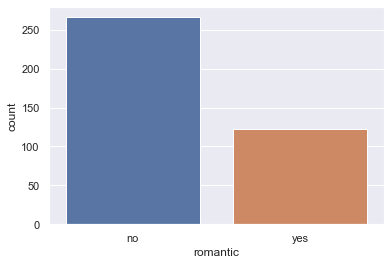

In [67]:
replace_nan_by_mode('romantic')

Столбец  famrel
---------------------------
Уникальных значений 6


 4.0    178
 5.0     96
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  361 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


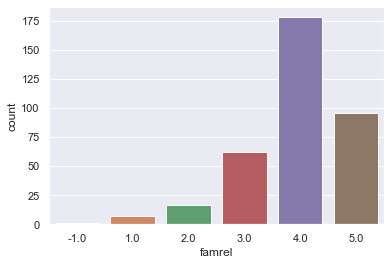

Пропущено значений  27


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,yes,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,-6.0,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,other,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,other,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,yes,no,NaN,2.0,4.0,5.0,20.0,40.0


In [68]:
column_info('famrel')

вероятно значение -1 это опечатка, заменим на 1

In [69]:
students.loc[students.famrel == -1, 'famrel'] = 1

пропущенных значений 27, заменить на моду - плохой выбор, введем новую категорию -1, можно было б думать в сторону замены пропусков в пропорциональных частях, но кажется этот параметр может не войти в модель.

In [70]:
students.famrel.fillna(-1, inplace=True)

Столбец  freetime
---------------------------
Уникальных значений 5


3.0    152
4.0    109
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  379 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


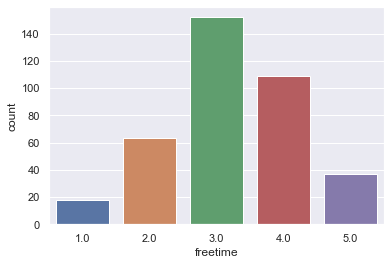

Пропущено значений  9


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,UNK,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,UNK,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
280,GP,M,17,U,UNK,A,4.0,2.0,services,other,home,mother,2.0,1.0,-1.0,no,no,yes,yes,yes,-3.0,yes,yes,no,4.0,NaN,4.0,5.0,30.0,40.0
290,GP,M,18,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,-1.0,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,other,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,-6.0,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,2.0,2.0,no,no,no,no,no,0.0,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0
338,GP,F,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,-12.0,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0


In [71]:
column_info('freetime')

Столбец  goout
---------------------------
Уникальных значений 5


3.0    126
2.0    101
4.0     81
5.0     50
1.0     23
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   381 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


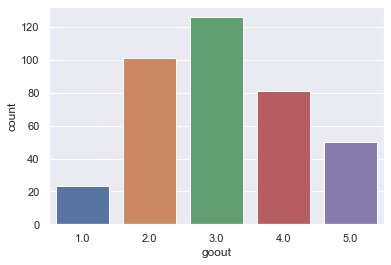

Пропущено значений  7


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,U,LE3,T,2.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,UNK,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,UNK,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,-9.0,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
241,GP,M,17,U,LE3,A,4.0,4.0,teacher,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


In [72]:
column_info('goout')

Столбец  health
---------------------------
Уникальных значений 5


5.0    137
3.0     88
4.0     60
1.0     46
2.0     42
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  373 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


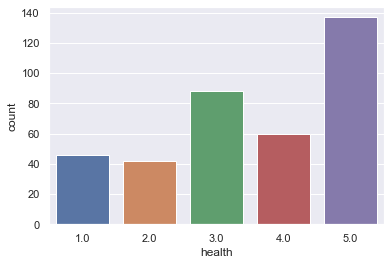

Пропущено значений  15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,other,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,UNK,3.0,2.0,services,at_home,home,mother,1.0,1.0,-1.0,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,mother,4.0,2.0,3.0,no,no,no,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,-3.0,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,2.0,other,other,home,father,1.0,2.0,-1.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0


In [73]:
column_info('health')

Для признаков freetime, goout, healt попробуем заполнить пропуски модами, оценим т-стастики, и сравним, что будет если заполним их новыми введенными категориями (-1)

Столбец  freetime
---------------------------
Уникальных значений 5


3.0    161
4.0    109
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


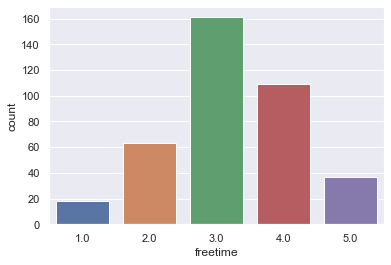

Столбец  goout
---------------------------
Уникальных значений 5


3.0    133
2.0    101
4.0     81
5.0     50
1.0     23
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


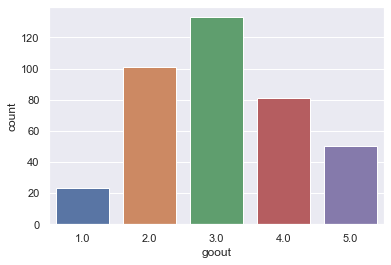

Столбец  health
---------------------------
Уникальных значений 5


5.0    152
3.0     88
4.0     60
1.0     46
2.0     42
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  388 non-null    float64
dtypes: float64(1)
memory usage: 16.1 KB


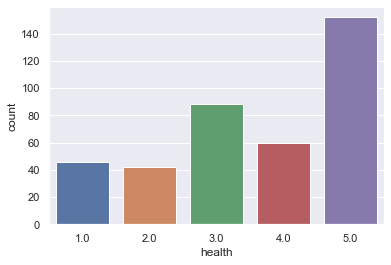

In [74]:
# заполнение модой
replace_nan_by_mode('freetime')
replace_nan_by_mode('goout')
replace_nan_by_mode('health')

In [75]:
# заполнение категорией -1
#students.freetime.fillna(-1, inplace=True)
#students.goout.fillna(-1, inplace=True)
#students.health.fillna(-1, inplace=True)


<Figure size 432x288 with 0 Axes>

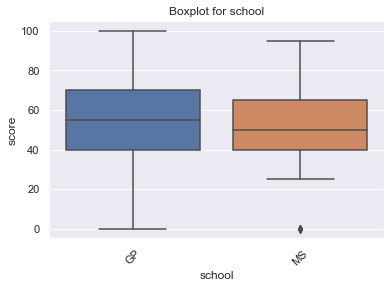

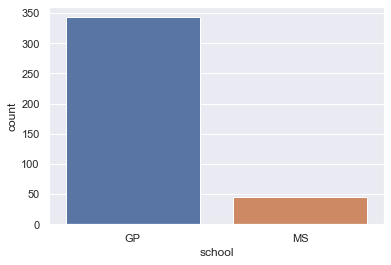

<Figure size 432x288 with 0 Axes>

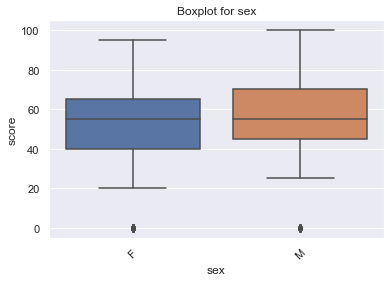

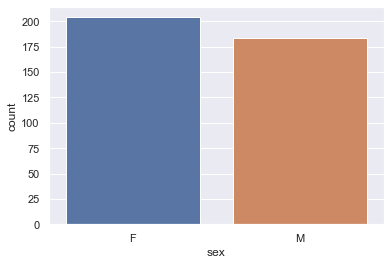

<Figure size 432x288 with 0 Axes>

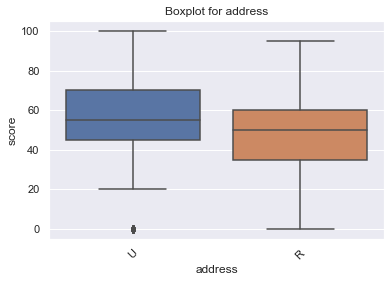

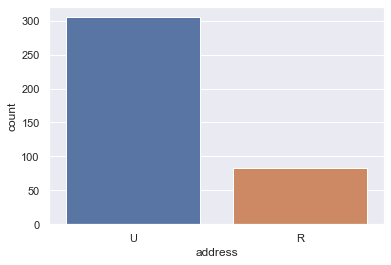

<Figure size 432x288 with 0 Axes>

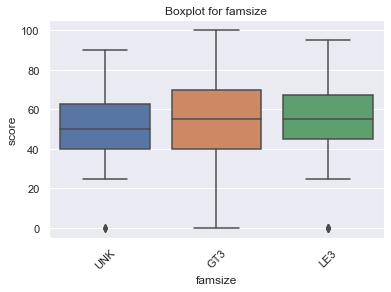

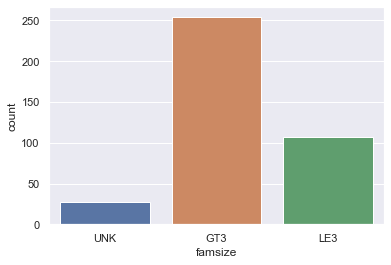

<Figure size 432x288 with 0 Axes>

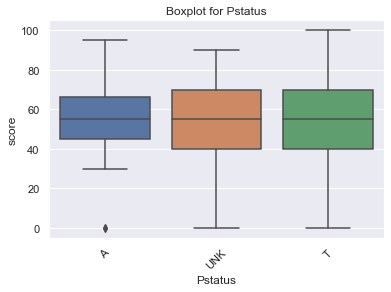

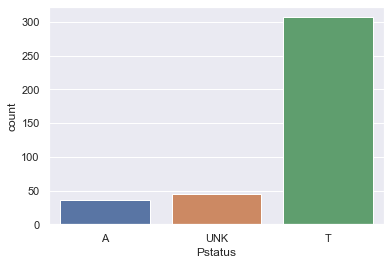

<Figure size 432x288 with 0 Axes>

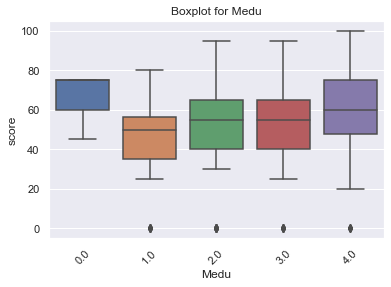

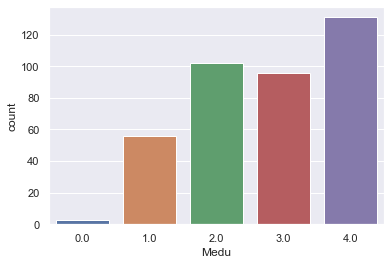

<Figure size 432x288 with 0 Axes>

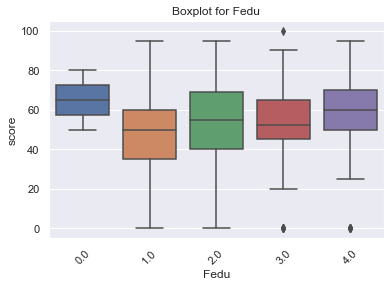

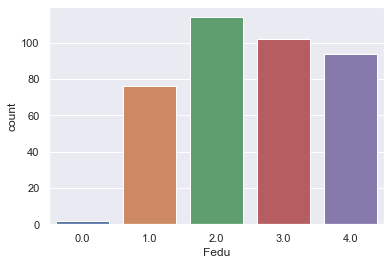

<Figure size 432x288 with 0 Axes>

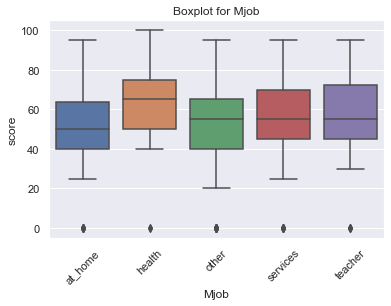

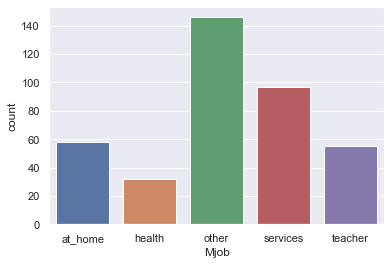

<Figure size 432x288 with 0 Axes>

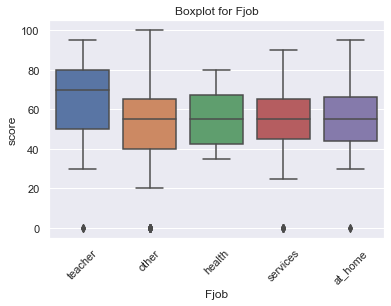

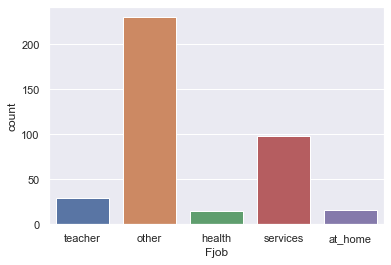

<Figure size 432x288 with 0 Axes>

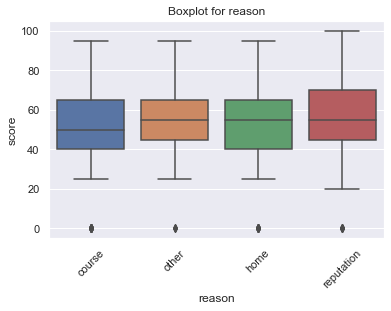

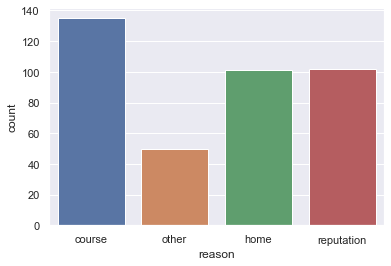

<Figure size 432x288 with 0 Axes>

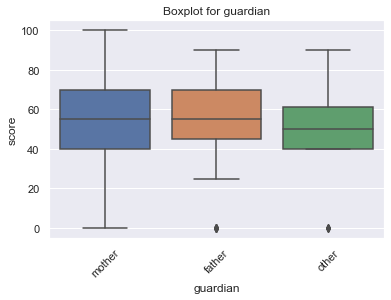

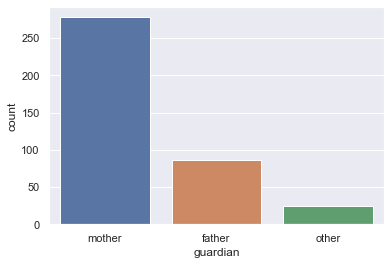

<Figure size 432x288 with 0 Axes>

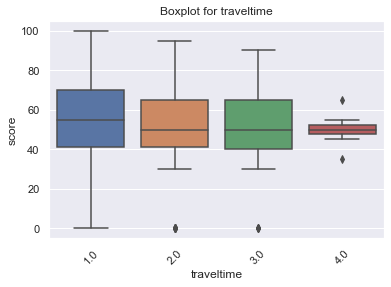

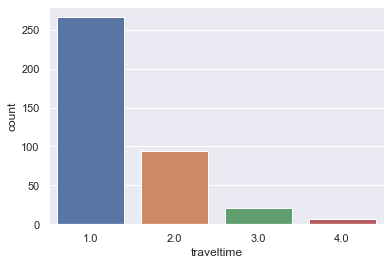

<Figure size 432x288 with 0 Axes>

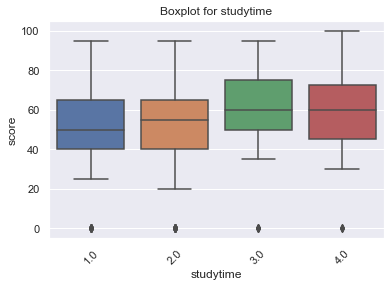

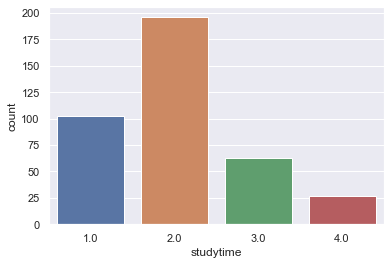

<Figure size 432x288 with 0 Axes>

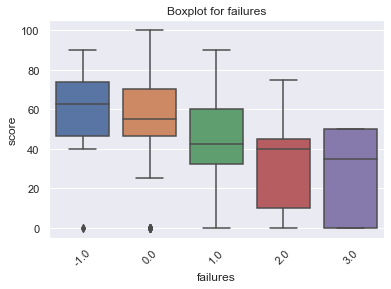

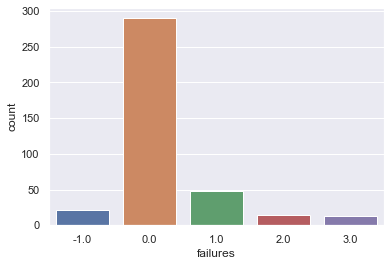

<Figure size 432x288 with 0 Axes>

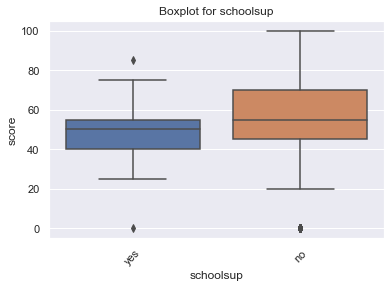

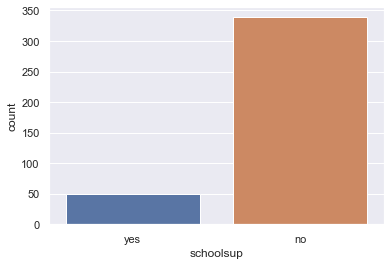

<Figure size 432x288 with 0 Axes>

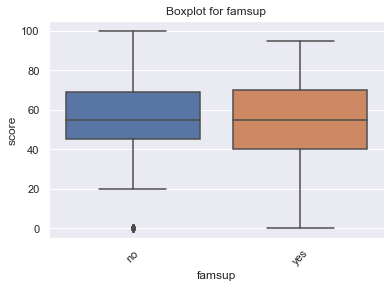

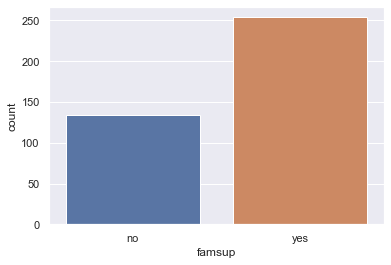

<Figure size 432x288 with 0 Axes>

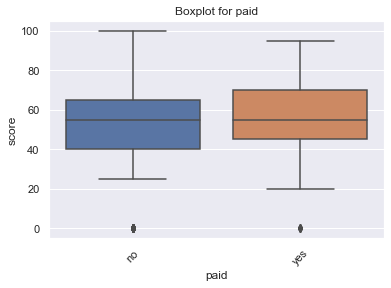

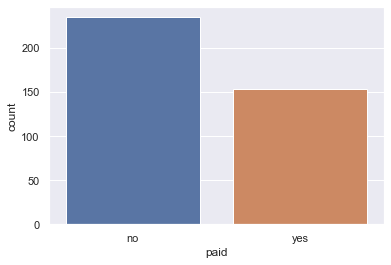

<Figure size 432x288 with 0 Axes>

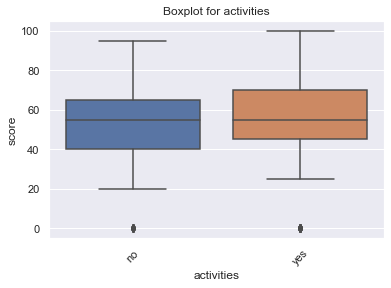

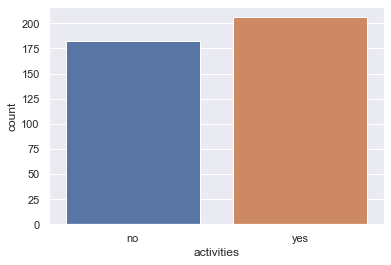

<Figure size 432x288 with 0 Axes>

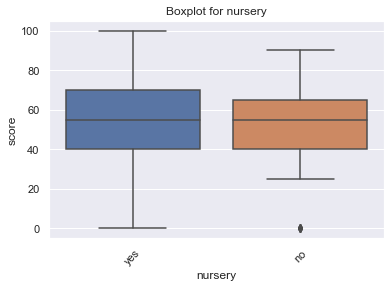

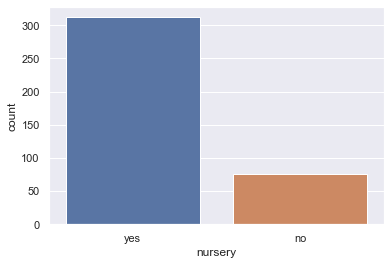

<Figure size 432x288 with 0 Axes>

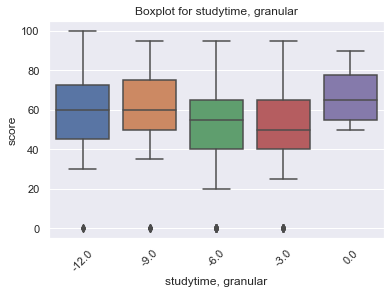

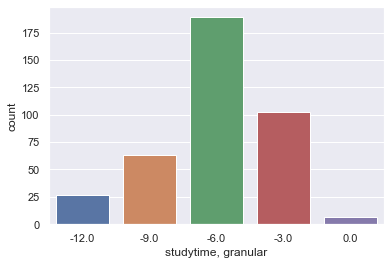

<Figure size 432x288 with 0 Axes>

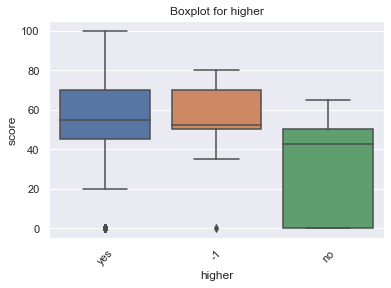

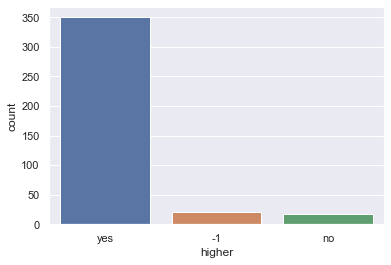

<Figure size 432x288 with 0 Axes>

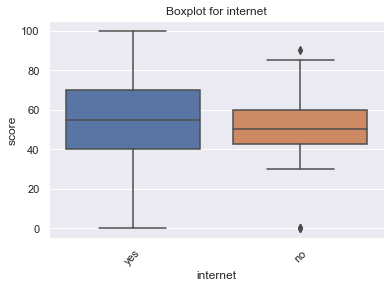

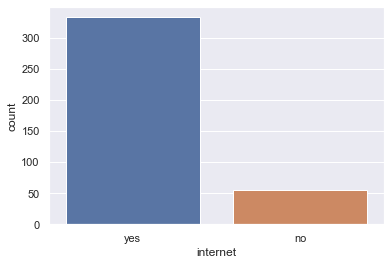

<Figure size 432x288 with 0 Axes>

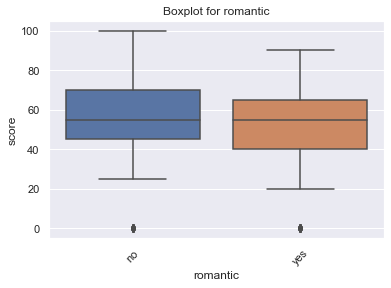

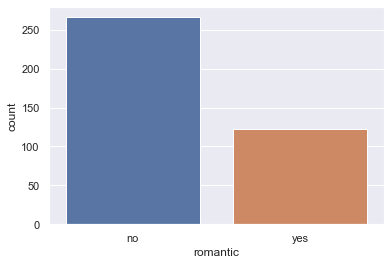

<Figure size 432x288 with 0 Axes>

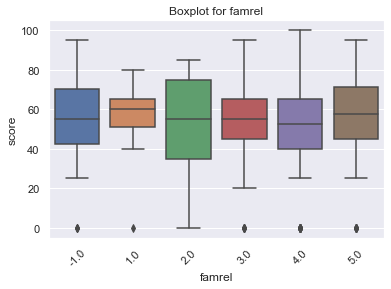

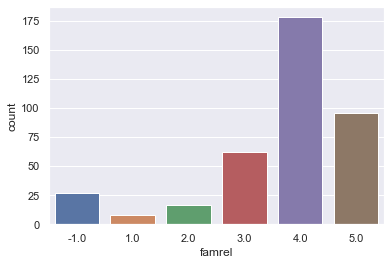

<Figure size 432x288 with 0 Axes>

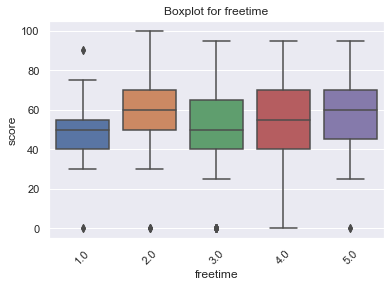

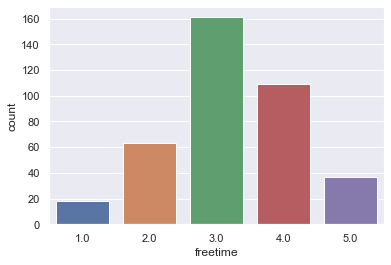

<Figure size 432x288 with 0 Axes>

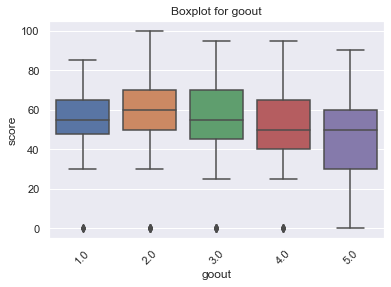

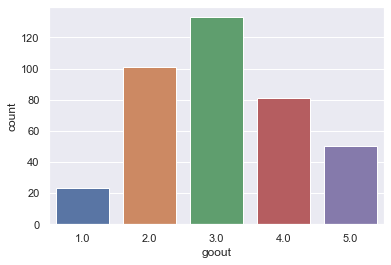

<Figure size 432x288 with 0 Axes>

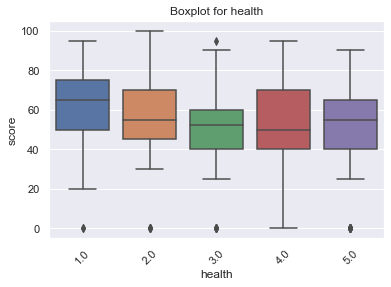

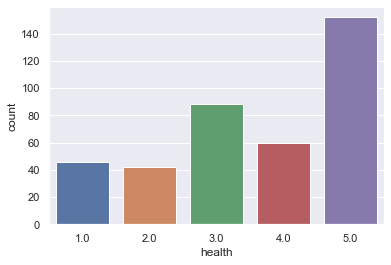

In [76]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_boxplot(col)

есть следуюшие предположения (если про столбец ничего не написано, то данные "интересные", с какими-то подозрениями на зависимости):

school: в одной школе размах данных большой, но и выборка студентов существенно больше чем во второй школе. возможно параметр не войдет в модель

famsize: семьи больше 3 человек - существенная часть выборки, имеет больший размах данных по успеваемости, чем другие категории, что логично, возможно этот параметр так же не будет входить в модель

Pstatus: имеет существенный перевес в выборке значение Т, при том, что на боксплоте видно, что срдняя успеваемость не варьируется в группах (A, UNK, T), размах по величине схож в группах (UNK, T). Возможно параметр не войдет в модель

reason: слабо варьируется средняя успеваемость в выделенных группах, возможно параметр не войдет в модель

guardian: тоже слабо варьируется средняя успеваемость, размах в группе с признаком mother больше, но и сама выборка существенно больше других. Возможно параметр не пойдет в модель

traveltime: слабо варьируется средняя успеваемость, размах с признаком 1 больше, как и сама выборка студентов с призаком 1. Возможно параметр не войдет в модель

famsup: Возможно не войдет в модель, на боксплоте не очевидны зависимости
paid: Возможно не войдет в модель, на боксплоте не очевидны зависимости
activities: Возможно не войдет в модель, на боксплоте не очевидны зависимости
nursery: Возможно не войдет в модель, на боксплоте не очевидны зависимости

intenet: количественно очень смещенная выборка по признаку (yes/no). разные размеры рахмахов. Возможно параметр не войдет в модель

famrel: слабо варьируется средняя успеваемость. Возможно параметр не войдет в модель

постановка теста "чем заполнить значения freetime, goout, healt": перезагрузить ядро юпитера, выполнить все стрOки до строкИ замены, дальше выполнить желанные замены пропусков, и сравнить полученные в двух разных "заполнениях" результируещие списки значимых критериев (функция get_stat_dif).

заполненно модами:

Найдены статистически значимые различия для колонки sex

Найдены статистически значимые различия для колонки address

Найдены статистически значимые различия для колонки Medu

Найдены статистически значимые различия для колонки Mjob

Найдены статистически значимые различия для колонки failures

Найдены статистически значимые различия для колонки higher

Найдены статистически значимые различия для колонки romantic



заполнено новыми категориями -1:

Найдены статистически значимые различия для колонки sex

Найдены статистически значимые различия для колонки address

Найдены статистически значимые различия для колонки Medu

Найдены статистически значимые различия для колонки Mjob

Найдены статистически значимые различия для колонки failures

Найдены статистически значимые различия для колонки higher

Найдены статистически значимые различия для колонки romantic


списки совпадают

дабы не плодить сущности для замены выбираем значения мод

In [77]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


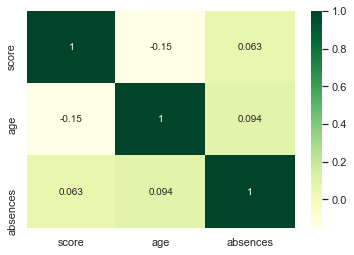

In [78]:
correlation1 = students[['score', 'age', 'absences']].corr()
sns.heatmap(correlation1, annot=True, cmap='YlGn')

age, absences имеют корреляцию с успеваемостью -0.15 и ~0.1(округлили). Добавим их в модель.

ради исследовательствого интереса предположим, что sudytime, granular это числовое знаечние

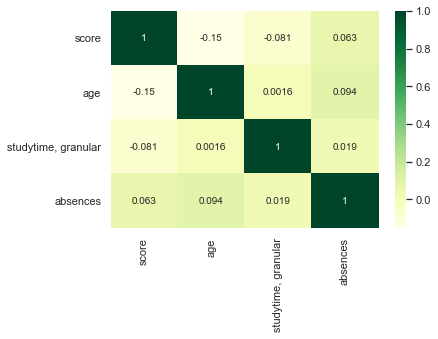

In [79]:
correlation2 = students[['score', 'age',
                         'studytime, granular', 'absences']].corr()
sns.heatmap(correlation2, annot=True, cmap='YlGn')

из интересного: видно слабую корреляцию между studytime, granular(sg) и absences. Возможно неописанный признак sg имеет физический смысл частичной учебы то дома то в школе в связи с пропусками занятий, но помним, что мы предположили что значения -3,-6,-9,-12,0 сейчас несут числовой смысл, не категориальный. это всего лишь наши допущения.

In [80]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               388 non-null    object 
 1   sex                  388 non-null    object 
 2   age                  388 non-null    int64  
 3   address              388 non-null    object 
 4   famsize              388 non-null    object 
 5   Pstatus              388 non-null    object 
 6   Medu                 388 non-null    float64
 7   Fedu                 388 non-null    float64
 8   Mjob                 388 non-null    object 
 9   Fjob                 388 non-null    object 
 10  reason               388 non-null    object 
 11  guardian             388 non-null    object 
 12  traveltime           388 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             388 non-null    float64
 15  schoolsup            388 non-null    obj

Промежуточные выводы написаны по ходу блокнота и в выполняемых командах

Резюме

Основываясь на т-тесте в модель к рассмотрению предлагается включить следующие столбцы:
sex
address
Medu
Mjob
failures
higher
romantic

так же включить в модель age и absences. Последний признак довольно противоречивый, считаю важным оставить его без отсечения выбросов, принимать дальнейшее решение по его видоизменению (убрать выбросы) или полному удалению, с учетом дальнейшего хода исследований.



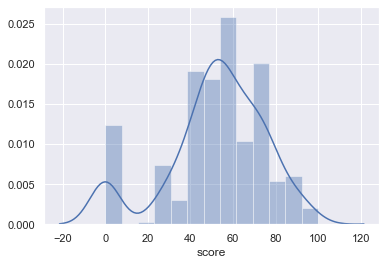

In [81]:
sns.distplot(students.score)

график получился бимодальным из-за наличия большого количества записей с успеваемостью 0. Значение 0 не является выбросом. Визуально "колокол" распределения успеваемости похож на нормальное распределение. Распрделение возраста (jointplot ниже)тоже имеет форму смещенного колокола. 

Целесообразность считать что это нормальное распределение сомнительна из соображений здравого смысла: поступающие в школу на первый год обучения имеют(в среднем) константный возраст, в процессе обучения учащиеся могут отчисляться, и соответственно на следующих курсах (более старших студентов) их может учиться меньше. НО, тут надо больше знать о том как собирались данные этой выборки, да и вообще скорее надо учитывать, что сама величина возраст - Дискретная, а не непрерывная, но модель это модель...

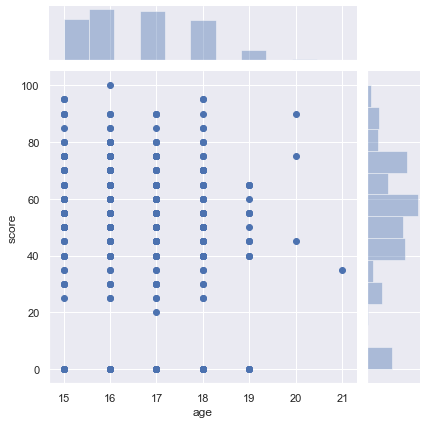

In [82]:
sns.jointplot(x='age',
              y='score',
              data=students)

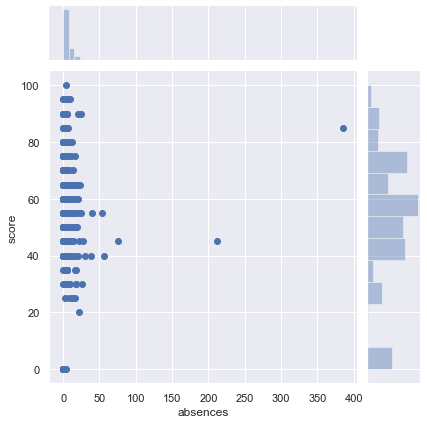

In [83]:
sns.jointplot(x='absences',
              y='score',
              data=students)

посмотрим "что будет если"
обрежем выбросы по параметру absences и посмотрим на распределние успеваемости/пропусков, так красивее видно распределение параметра absences, который словами можно описать, что среди студентов существует тенденция не пропускать занятия.

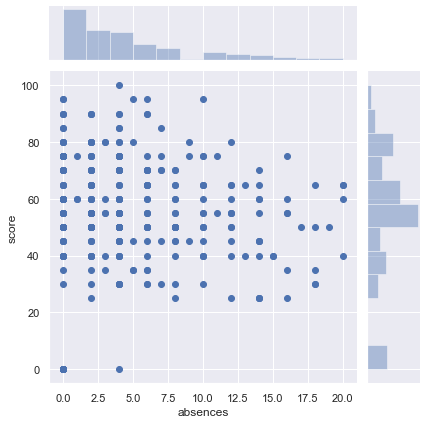

In [84]:
stud_absenses_otliers = students.loc[students.absences <= 20]
sns.jointplot(x='absences',
              y='score',
              data=stud_absenses_otliers)

Далее быстрый эксперимент на коленке "а что будет если" из существуюшей выборки мы б удаляли все строки, где встречались какие-то незаполненные значения

In [85]:
stud_super_cutted = pd.read_csv('stud_math.csv')
columns = stud_super_cutted.columns
columns
for col in columns:
    stud_super_cutted = stud_super_cutted.loc[~stud_super_cutted[col].isna()]

stud_super_cutted.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,16.835052,2.886598,2.556701,1.443299,2.113402,0.257732,-6.340206,3.917526,3.226804,3.051546,3.371134,5.721649,52.061856
std,1.359231,1.049566,1.089429,0.644998,0.876502,0.599971,2.629506,0.897567,1.075341,1.064299,1.431197,6.953330,21.049948
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,-9.000000,4.000000,3.000000,2.000000,2.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.000000,3.000000,0.000000,-6.000000,4.000000,4.000000,4.000000,5.000000,8.000000,65.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,40.000000,95.000000


In [86]:
def nominative_column_to_str_s_c(column):
    stud_super_cutted[column] = stud_super_cutted[column].apply(
        lambda x: x if pd.isna(x) else str(int(x)))
    
nominative_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                   'famrel', 'freetime', 'goout', 'health']

for col in nominative_cols:
    nominative_column_to_str_s_c(col)

осталось 97 записей

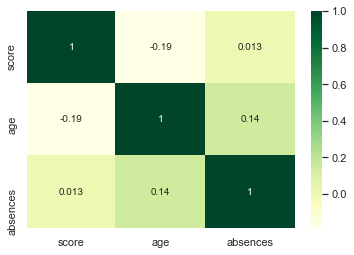

In [87]:
corr_s_c1 = stud_super_cutted[['score', 'age', 'absences']].corr()
sns.heatmap(corr_s_c1, annot=True, cmap='YlGn')

тут корреляции глобально - как были незначительными, так и остались, даже еще меньше видна связь успеваемости и пропусков (ну маленькая выборка, как ни крути)

In [ ]:
def get_stat_dif_s_c(column):
    cols = stud_super_cutted.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_super_cutted.loc[stud_super_cutted.loc[:, column] == comb[0], 'score'],
                     stud_super_cutted.loc[stud_super_cutted.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_stat_dif_s_c(col)

конечно и тут другой набор ответов выходит. видно, что он сильно отличается, если изменить параметр alpha 0.1, то еще к списку добавить колонка failures.
В общем это очень не похоже на то, какие выводы были сделаны по большей выборке, где я максимально вдумчиво старалась дополнить пробелы в данных. 

ВЫВОД: надо стараться дополнять данные, а не безжалостно их выбрасывать

тест

заменили некоторые категориальные данные (2 значения) с сохранением пропорции распределения значений.

famsup, schoolsup, paid, activities, nursery, interner

провели т-тест. получили такой же набор значимых параметров.

значит такая предобработка данных тоже имеет право на существование

In [ ]:
students = pd.read_csv('stud_math.csv')


'''NAN fill'''
students = students.loc[students.age <= 21]
students = students.loc[~students.score.isna()]
replace_nan_by_median('absences')
students.address = students.address.apply(
    lambda x: 'U' if pd.isna(x) else x)
students.famsize = students.famsize.apply(
    lambda x: 'UNK' if pd.isna(x) else x)
students.Pstatus = students.Pstatus.apply(
    lambda x: 'UNK' if pd.isna(x) else x)
correctMedu_byMjob()
students.loc[students.Fedu == 40, 'Fedu'] = 4
correctFedu_byFjob()
students.Mjob = students.Mjob.apply(lambda x: 'other' if pd.isna(x) else x)
students.Fjob = students.Fjob.apply(lambda x: 'other' if pd.isna(x) else x)
correctFedu_byFjob()
correctMedu_byMjob()
students.reason = students.reason.apply(
    lambda x: 'other' if pd.isna(x) else x)
replace_nan_by_mode('guardian')
replace_nan_by_mode('traveltime')
replace_nan_by_mode('studytime')
students.failures.fillna(-1, inplace=True)

replace_nan_in_propotion('famsup')
replace_nan_in_propotion('schoolsup')
replace_nan_in_propotion('paid')
replace_nan_in_propotion('activities')
replace_nan_in_propotion('nursery')

students['studytime, granular'].fillna(0, inplace=True)
students.higher.fillna(-1, inplace=True)

replace_nan_in_propotion('internet')


replace_nan_by_mode('romantic')
students.loc[students.famrel == -1, 'famrel'] = 1
students.famrel.fillna(-1, inplace=True)
replace_nan_by_mode('freetime')
replace_nan_by_mode('goout')
replace_nan_by_mode('health')


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_stat_dif(col)

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_stat_dif(col)